# ANN

In [1]:
import pandas as pd
import numpy as np 


df = pd.read_csv("out.csv")

In [2]:
df.head()

,Time(s),acc_x(g),acc_y(g),acc_z(g),gyr_x(°/s),gyr_y(°/s),gyr_z(°/s),mag_x(G),mag_y(G),mag_z(G),SVM(g),yaw(°),pitch(°),roll(°),Class
0,0.000,1.22,-0.10,-0.14,3.20,-14.54,-9.74,81.93,-605.78,-321.0,1.23,106.19,73.58,10.55,0
1,0.030,0.89,-0.06,-0.09,7.86,26.99,-5.22,83.93,-608.65,-324.0,0.90,106.10,73.64,10.58,0
2,0.060,0.92,0.01,0.24,5.29,47.51,-12.45,82.93,-600.98,-329.0,0.95,106.79,72.51,10.92,0
3,0.089,0.98,0.08,0.53,5.57,26.99,-11.76,86.93,-591.40,-337.0,1.12,107.55,71.19,11.24,0
4,0.118,0.94,-0.04,0.38,0.90,-30.96,2.50,88.93,-595.23,-335.0,1.01,107.70,70.99,11.43,0


In [3]:
df.columns

Index(['Time(s)', 'acc_x(g)', 'acc_y(g)', 'acc_z(g)', 'gyr_x(°/s)',
       'gyr_y(°/s)', 'gyr_z(°/s)', 'mag_x(G)', 'mag_y(G)', 'mag_z(G)',
       'SVM(g)', 'yaw(°)', 'pitch(°)', 'roll(°)', 'Class'],
      dtype='object')

In [4]:
variables = ['Time(s)', 'acc_x(g)', 'acc_y(g)', 'acc_z(g)', 'gyr_x(°/s)',
       'gyr_y(°/s)', 'gyr_z(°/s)', 'mag_x(G)', 'mag_y(G)', 'mag_z(G)',
       'SVM(g)', 'yaw(°)', 'pitch(°)', 'roll(°)']
target = 'Class'

In [5]:
X = df[variables]
y = df[target]

print(X.shape)
print(y.shape)

(115368, 14)
(115368,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

In [7]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(X_train[['Time(s)', 'acc_x(g)', 'acc_y(g)', 'acc_z(g)', 'gyr_x(°/s)',
       'gyr_y(°/s)', 'gyr_z(°/s)', 'mag_x(G)', 'mag_y(G)', 'mag_z(G)',
       'SVM(g)', 'yaw(°)', 'pitch(°)', 'roll(°)']])

X_train = ss.transform(X_train[['Time(s)', 'acc_x(g)', 'acc_y(g)', 'acc_z(g)', 'gyr_x(°/s)',
       'gyr_y(°/s)', 'gyr_z(°/s)', 'mag_x(G)', 'mag_y(G)', 'mag_z(G)',
       'SVM(g)', 'yaw(°)', 'pitch(°)', 'roll(°)']])

In [13]:
X_test = ss.transform(X_test[['Time(s)', 'acc_x(g)', 'acc_y(g)', 'acc_z(g)', 'gyr_x(°/s)',
       'gyr_y(°/s)', 'gyr_z(°/s)', 'mag_x(G)', 'mag_y(G)', 'mag_z(G)',
       'SVM(g)', 'yaw(°)', 'pitch(°)', 'roll(°)']])

In [18]:
import warnings
warnings.filterwarnings('ignore')
 
#Importing Keras and Tensorflow for Deep Learning
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

#Importing other libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Importing libraries for model evaluation 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



from sklearn.metrics import f1_score
callbacks = [EarlyStopping(monitor='val_loss',mode='min',patience=2, restore_best_weights = True)]
results_control_accuracy = []
for i in range(0,30):
    model = Sequential()
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(keras.optimizers.Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

    history = model.fit(X_resampled, y_resampled, callbacks = callbacks,
          epochs=30,validation_split = 0.2,
          batch_size=256, verbose = 0)

    y_test_pred= model.predict(X_test) > 0.5
    
    f1 = f1_score(y_test, y_test_pred)
    
    results_control_accuracy.append(f1)
    
print(results_control_accuracy)

[0.9643165547786847, 0.9647130343474537, 0.96445405645206, 0.9635955305403832, 0.9643424439940844, 0.9655765443399629, 0.9663318247047136, 0.960869083250194, 0.959075962308989, 0.9659380894263841, 0.9662263835479018, 0.9556967292701195, 0.9681084641563289, 0.965107933528405, 0.9666805845511482, 0.9673777703992695, 0.9681135455422352, 0.9646817476158793, 0.9616413916146298, 0.9671517671517671, 0.9642078538510361, 0.9617311822036232, 0.9633990558178284, 0.9634971707533562, 0.9627496053396847, 0.9608625755307943, 0.9674798994280662, 0.9618827203524524, 0.9675777359743277, 0.9686620689655172]


In [19]:
results_control_accuracy = pd.DataFrame(results_control_accuracy)
mean_control_accuracy = results_control_accuracy.mean()
print("Mean Control Accuracy: {}".format(mean_control_accuracy))

Mean Control Accuracy: 0    0.964402
dtype: float64


In [20]:
std_control_accuracy = results_control_accuracy.std()
print("Standard Deviation of Control Accuracy Results: {}".format(std_control_accuracy))


Standard Deviation of Control Accuracy Results: 0    0.002958
dtype: float64


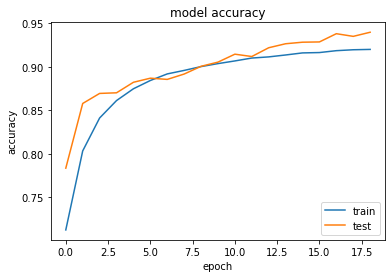

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

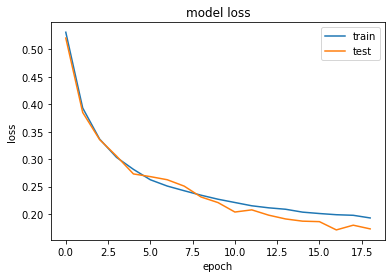

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [23]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[ 4381   358]
 [  778 17557]]


In [24]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4739
           1       0.98      0.96      0.97     18335

    accuracy                           0.95     23074
   macro avg       0.91      0.94      0.93     23074
weighted avg       0.95      0.95      0.95     23074



In [25]:
auc = roc_auc_score(y_test, y_pred)


print(auc)

0.9967136560069094


In [32]:
for col in X.columns:
    print("The variance of the {} before scaling is: {}" .format(col, X[col].var()))

The variance of the Time(s) before scaling is: 68244322.82658425
The variance of the acc_x(g) before scaling is: 0.3878275100102946
The variance of the acc_y(g) before scaling is: 0.31983020891094616
The variance of the acc_z(g) before scaling is: 0.34293864213427355
The variance of the gyr_x(°/s) before scaling is: 1176.0464658101216
The variance of the gyr_y(°/s) before scaling is: 3359.6695256905655
The variance of the gyr_z(°/s) before scaling is: 1013.7066858732238
The variance of the mag_x(G) before scaling is: 67217.36981894223
The variance of the mag_y(G) before scaling is: 54367.529752997965
The variance of the mag_z(G) before scaling is: 37641.635465841406
The variance of the SVM(g) before scaling is: 0.17340088608274487
The variance of the yaw(°) before scaling is: 14998.573954356318
The variance of the pitch(°) before scaling is: 1603.6675373295072
The variance of the roll(°) before scaling is: 1247.6242205369724


In [33]:
X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)

In [34]:
for col in X.columns:
    print("The variance of the {} before scaling is: {}" .format(col, X[col].var()))

The variance of the Time(s) before scaling is: 1.0000086679899987
The variance of the acc_x(g) before scaling is: 1.0000086679900229
The variance of the acc_y(g) before scaling is: 1.0000086679899376
The variance of the acc_z(g) before scaling is: 1.0000086679898024
The variance of the gyr_x(°/s) before scaling is: 1.0000086679898401
The variance of the gyr_y(°/s) before scaling is: 1.0000086679898053
The variance of the gyr_z(°/s) before scaling is: 1.0000086679900522
The variance of the mag_x(G) before scaling is: 1.00000866798996
The variance of the mag_y(G) before scaling is: 1.000008667989964
The variance of the mag_z(G) before scaling is: 1.0000086679899893
The variance of the SVM(g) before scaling is: 1.0000086679902278
The variance of the yaw(°) before scaling is: 1.000008667989979
The variance of the pitch(°) before scaling is: 1.0000086679899374
The variance of the roll(°) before scaling is: 1.0000086679899678
